In [2]:
import os
import urllib.request
import os
import urllib.request
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
os.sys.path.append('/Users/djuna/Documents/ABCA7lof2/')
from ABCA7lof2.lcms_funcs import return_stats, plot_volcano, plot_pca, count_unsaturations, count_carbons, plot_lfcs, plot_carbon_distributions, plot_class_counts, plot_with_blank, classify_fatty_acid_length, classify_unsaturation
# load libraries

output_dir = "../../LCMS/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

urls = ['https://storage.googleapis.com/abca7lof/LCMS/SUB14737/5041.SUB14737_LipidXData.csv']

for url in urls:
    local_filename = os.path.join(output_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, local_filename)
    print("Download completed!")

Download completed!


In [3]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests


In [4]:
# get metadata 
# Load data 
output_dir = '../../../LCMS/'

# Load the Excel file
excel_file = os.path.join(output_dir, '8074.SUB14547_LididomicsData.xlsx')

# Load the sheet into a DataFrame
sheet_name = 'All lipids'  # Replace with the actual sheet name if different
meta = pd.read_excel(excel_file, sheet_name=sheet_name)

metadata = meta.iloc[5:24,49:]
metadata.columns = meta.iloc[3,49:]
dictionary_date = dict(zip(metadata['LS name'], metadata.iloc[:,2].astype(str)))
dictionary_grp = dict(zip(metadata['LS name'], metadata.iloc[:,3]))


/Users/djuna/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [5]:
# load data
data = pd.read_csv(output_dir + '7257.SUB14547_LipidXdata.csv')

# get areas
areas = data[[col for col in data.columns if col.startswith('area[')]]
areas.index = data['name']
names = np.array([x.split('[')[1].split(']')[0] for x in areas.columns])
areas_columns = np.array([dictionary_grp[x] for x in names])
areas_dates = np.array([dictionary_date[x] for x in names])

areas_24 = areas.iloc[:,areas_dates=='2024-04-24 00:00:00']
names_24 = areas_columns[areas_dates=='2024-04-24 00:00:00']

In [6]:
palette = {
    'Sphingolipids':'#1DC9A4',
    'Neutral lipids':'#E3120B',
    'Phospholipids':'#475ED1',
    'Fatty acyl and other lipids':'#F97A1F', 
    'Neutral glycerolipid':'#E3120B',	
    'Steroid':'#F9C31F', 
    'Glycoglycerolipids':'blue'
}

key = pd.read_csv(os.path.join(output_dir, 'LipidKey.csv'))
dictionary = dict(zip(key['Key'], key['Class']))


In [7]:
# return stats for E3 vs G2
stats = return_stats(areas_24, names_24, 'E3 H2O', 'G2 H2O')
stats['name'] = stats.index
stats['grp'] = [dictionary[x.split('(')[0]] for x in stats.index]
stats = stats.dropna(subset=['log2_fold_change'])
stats['cat'] = 'other'

stats.sort_values(by='p_value')[:20]


/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:33: RuntimeWarning: divide by zero encountered in log2
  log2_fold_change = np.log2(mean_group2 / mean_group1) if mean_group1 != 0 else np.nan


,t_stat,p_value,log2_fold_change,fdr_corrected_p_value,name,grp,cat
PC(17:1)+H_34.17,11.810772,0.000128,0.860282,0.028397,PC(17:1)+H_34.17,Phospholipids,other
MLCL(46:4)-2H_21.65,12.023704,0.000306,1.396201,0.031921,MLCL(46:4)-2H_21.65,Phospholipids,other
TG(20:4_10:2_14:4)+NH4_37.71,8.098754,0.000489,0.913805,0.031921,TG(20:4_10:2_14:4)+NH4_37.71,Neutral glycerolipid,other
PS(35:0)-H_30.98,7.379620,0.000719,0.741905,0.031921,PS(35:0)-H_30.98,Phospholipids,other
PC(32:1)+HCOO_30.97,7.379620,0.000719,0.741905,0.031921,PC(32:1)+HCOO_30.97,Phospholipids,other
PE(36:3)+Li_37.67,7.030711,0.000901,0.797967,0.033334,PE(36:3)+Li_37.67,Phospholipids,other
TG(18:0_11:4_16:0)+K_42.32,6.858192,0.001180,0.801724,0.034272,TG(18:0_11:4_16:0)+K_42.32,Neutral glycerolipid,other
PC(18:0_16:0)+Na_44.75,6.788435,0.001277,0.718035,0.034272,PC(18:0_16:0)+Na_44.75,Phospholipids,other
PS(34:0)-H_23.0,6.473317,0.001389,0.941763,0.034272,PS(34:0)-H_23.0,Phospholipids,other
TG(18:4_10:3_18:3)+NH4_32.03,8.599039,0.002204,1.211501,0.048923,TG(18:4_10:3_18:3)+NH4_32.03,Neutral glycerolipid,other


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_76252/1732926421.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['cat'][(data[lfc_col]<0) & (data[pval_col]<0.05)] = 'down'
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/

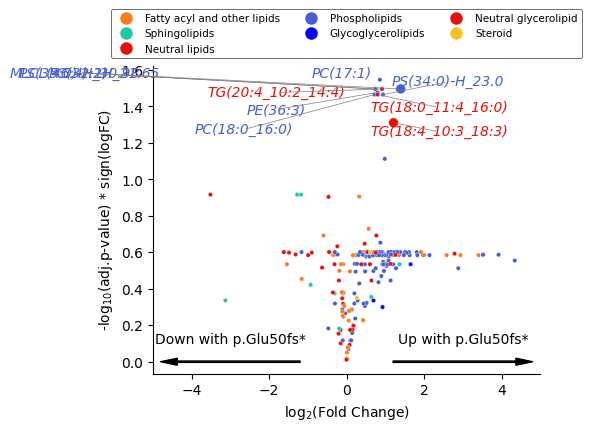

In [261]:
# plot volcano 
plot_volcano('fdr_corrected_p_value', 'name', 'grp', 'log2_fold_change', stats, palette)
plt.ylabel('-log$_{10}$(adj.p-value) * sign(logFC)')

plt.annotate('', xy=(5,0), xytext=(1, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.text(3, .1, 'Up with p.Glu50fs*', ha='center', fontsize=10)

plt.annotate('', xy=(-5,0), xytext=(-1, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.text(-3, .1, 'Down with p.Glu50fs*', ha='center', fontsize=10)

plt.xlim(-5,5)

labels = stats['grp'].unique()

handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=palette[label], markersize=10)
    for label in labels
]

legend = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, frameon=True, fontsize=7.5)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.5)

In [267]:
names_24

array(['Y622 H2O', 'Y622 H2O', 'Y622 CDP-Choline (lifted)',
       'Y622 CDP-Choline', 'Y622 CDP-Choline', 'Y622 CDP-Choline',
       'E3 H2O', 'E3 H2O', 'E3 H2O', 'E3 H2O', 'G2 H2O', 'G2 H2O',
       'G2 H2O'], dtype='<U25')

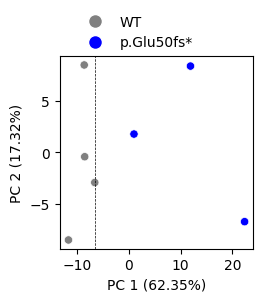

In [268]:
plot_pca(areas_24.iloc[:,(names_24=='E3 H2O') | (names_24=='G2 H2O')], names_24[(names_24=='E3 H2O') | (names_24=='G2 H2O')], palette={'E3 H2O':'gray', 'G2 H2O' : 'blue'}, draw_median=True)

# Add a custom legend based on marker type
legend_elements = [
    Line2D([0], [0], marker='o', color='w',
        markerfacecolor='grey', markersize=10,linestyle='None', label='WT'),
    Line2D([0], [0], marker='o', markerfacecolor='blue',color='w',
        markersize=10, linestyle='None', label='p.Glu50fs*')
]
plt.legend(handles=legend_elements, title='', bbox_to_anchor=(.4, 1.28), loc='upper center', frameon=False)

/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_ylabel(df['class'][0], rotation=0, ha='right', va='center')
/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_ylabel(df['class'][0], rotation=0, ha='right', va='center')
/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

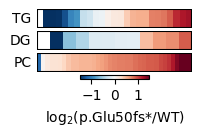

In [272]:
stats['class'] = [x.split('(')[0] for x in stats.index]
heatmap_data_list = [
    stats[stats['class'] == 'TG'],
    stats[stats['class'] == 'DG'],
    stats[stats['class'] == 'PC']
]
cbar = plot_lfcs(heatmap_data_list, 'log2_fold_change')
cbar.set_label('log$_{2}$(p.Glu50fs*/WT)')

In [273]:
stats['carbons'] = stats['name'].apply(count_carbons)
stats['unsaturations'] = stats['name'].apply(count_unsaturations)


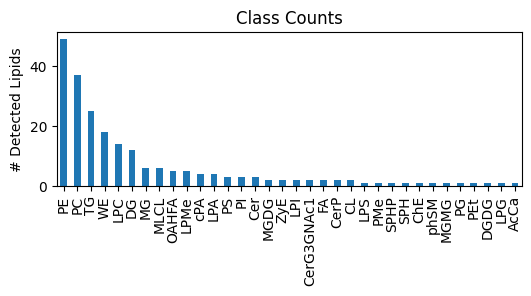

In [278]:
plt.figure(figsize=(6,2))
plot_class_counts(stats)

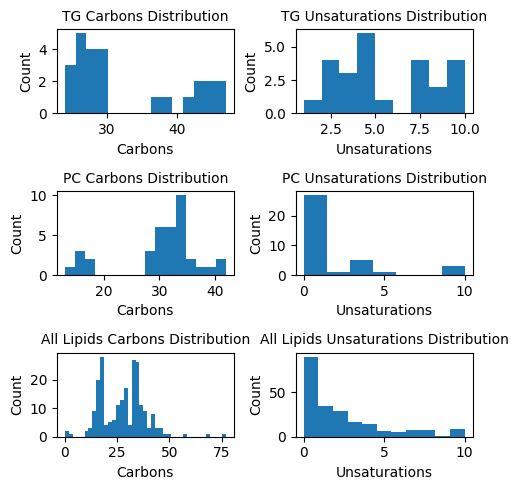

In [279]:
plot_carbon_distributions(stats)

In [280]:
# by group stats
groups = [x.split('(')[0] for x in areas_24.index]
by_grp = areas_24.groupby(groups).sum()
by_grp_stats = return_stats(by_grp, names_24,  'E3 H2O', 'G2 H2O')

by_grp_stats['score'] = -1*np.log10(by_grp_stats['p_value']) * np.sign(by_grp_stats['log2_fold_change'])
by_grp_stats.sort_values(by='p_value')

,t_stat,p_value,log2_fold_change,fdr_corrected_p_value,score
PS,6.003923,0.001874,0.668969,0.065574,2.727337
MLCL,5.408506,0.004597,0.828414,0.080448,2.337520
CerG3GNAc1,-6.048960,0.009057,-9.138079,0.105664,-2.043020
cPA,4.303549,0.045973,1.219964,0.256770,1.337501
FA,3.876858,0.048089,0.446604,0.256770,1.317957
MGMG,3.231716,0.063797,1.147633,0.256770,1.195197
PC,3.504048,0.064087,0.788518,0.256770,1.193233
PE,2.978038,0.064951,0.533209,0.256770,1.187417
MG,2.683830,0.067434,0.270594,0.256770,1.171118
PI,2.261242,0.073363,0.741822,0.256770,1.134524


In [296]:
# classify fatty acids in TGs
selected_rows_TG = areas_24[np.array(groups)=='TG']

carbon_counts_classified = np.array([classify_fatty_acid_length(np.round(count_carbons(x)/3)) for x in selected_rows_TG.index])

by_grp = selected_rows_TG.groupby(carbon_counts_classified).sum()
by_grp_stats = return_stats(by_grp, names_24,  'E3 H2O', 'G2 H2O')
by_grp_stats



,t_stat,p_value,log2_fold_change,fdr_corrected_p_value
LCFA,7.242039,0.002039,0.759061,0.004078
MCFA,-0.419149,0.698724,-0.098501,0.698724


In [297]:
np.unique(carbon_counts_classified, return_counts=True)

(array(['LCFA', 'MCFA'], dtype='<U4'), array([ 8, 17]))

In [298]:
# classify fatty acids in PCs
selected_rows_PC = areas_24[np.array(groups)=='PC']

carbon_counts_classified = np.array([classify_unsaturation(count_unsaturations(x)) for x in selected_rows_PC.index])

by_grp = selected_rows_PC.groupby(carbon_counts_classified).sum()
by_grp_stats = return_stats(by_grp, names_24,  'E3 H2O', 'G2 H2O')
by_grp_stats



,t_stat,p_value,log2_fold_change,fdr_corrected_p_value
MFA,5.617944,0.008220,0.829924,0.024660
PUFA,3.101697,0.058504,0.569749,0.068898
UFA,3.415376,0.068898,0.817972,0.068898


In [299]:
np.unique(carbon_counts_classified, return_counts=True)

(array(['MFA', 'PUFA', 'UFA'], dtype='<U4'), array([ 6, 10, 21]))

In [10]:
stats['carbons'] = stats['name'].apply(count_carbons)
stats['class'] = [x.split('(')[0] for x in stats.index]

<Axes: xlabel='carbons', ylabel='log2_fold_change'>

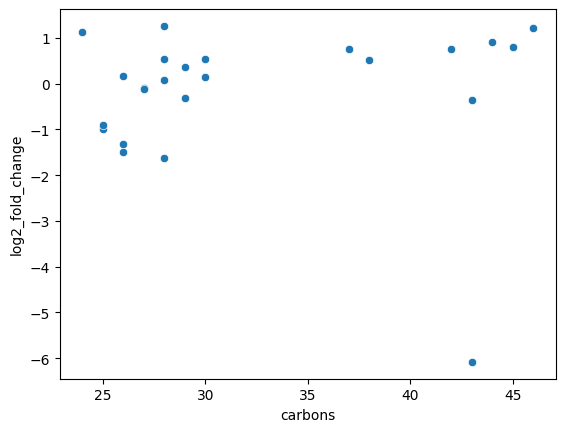

In [11]:
sns.scatterplot(data=stats[stats['class']=='TG'], x = 'carbons', y = 'log2_fold_change')